<a href="https://colab.research.google.com/github/mariegulstad/IS4447LABS/blob/main/Copy_of_lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
from google.colab import drive
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/x_superbowl.csv')

print (df)

Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id        id_str  \


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9756 non-null   int64  
 1   _id                        9756 non-null   object 
 2   created_at                 9756 non-null   object 
 3   id                         9756 non-null   float64
 4   id_str                     9756 non-null   float64
 5   text                       9756 non-null   object 
 6   display_text_range         3222 non-null   object 
 7   source                     9747 non-null   object 
 8   truncated                  9756 non-null   bool   
 9   in_reply_to_status_id      2863 non-null   float64
 10  in_reply_to_status_id_str  2863 non-null   float64
 11  in_reply_to_user_id        2985 non-null   float64
 12  in_reply_to_user_id_str    2985 non-null   float64
 13  in_reply_to_screen_name    2985 non-null   objec

In [ ]:
df.describe()

,Unnamed: 0,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,9756.000000,9.756000e+03,9.756000e+03,2.863000e+03,2.863000e+03,2.985000e+03,2.985000e+03,0.0,9756.000000,9756.000000,9756.000000,9756.000000,2.400000e+02,2.400000e+02
mean,4749.132226,1.360000e+18,1.358590e+18,1.359437e+18,1.357976e+18,7.659839e+17,7.661037e+17,NaN,0.024395,0.289565,0.187577,1.862854,1.353142e+18,1.351627e+18
std,2813.702919,0.000000e+00,2.346799e+13,1.816183e+16,1.813591e+16,5.780032e+17,5.781080e+17,NaN,0.248871,1.934631,3.435467,31.547737,5.228699e+16,5.209077e+16
min,0.000000,1.360000e+18,1.358560e+18,4.480000e+17,4.475270e+17,2.682300e+04,2.682300e+04,NaN,0.000000,0.000000,0.000000,0.000000,8.170000e+17,8.165590e+17
25%,2308.750000,1.360000e+18,1.358570e+18,1.360000e+18,1.358560e+18,1.399829e+09,1.399829e+09,NaN,0.000000,0.000000,0.000000,0.000000,1.360000e+18,1.358278e+18
50%,4747.500000,1.360000e+18,1.358590e+18,1.360000e+18,1.358580e+18,1.040000e+18,1.041530e+18,NaN,0.000000,0.000000,0.000000,0.000000,1.360000e+18,1.358545e+18
75%,7186.250000,1.360000e+18,1.358610e+18,1.360000e+18,1.358600e+18,1.280000e+18,1.284830e+18,NaN,0.000000,0.000000,0.000000,1.000000,1.360000e+18,1.358580e+18
max,9625.000000,1.360000e+18,1.358630e+18,1.360000e+18,1.358630e+18,1.360000e+18,1.358610e+18,NaN,12.000000,87.000000,264.000000,2830.000000,1.360000e+18,1.358630e+18


In [ ]:
df['user_mentioned'] = df['user'].str.count('@').fillna(0).astype(int)
df['id'] = df['id'].astype(int)


df['id'] = pd.to_numeric(df['id'], errors='coerce')

df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce')
df['favorite_count'] = pd.to_numeric(df['favorite_count'], errors='coerce')
df['user_mentioned'] = pd.to_numeric(df['user_mentioned'], errors='coerce')
df['reply_count'] = pd.to_numeric(df['user_mentioned'], errors='coerce')

In [ ]:
useful_cols = ['id', 'text', 'source', 'user_mentioned',
               'quote_count', 'reply_count', 'retweet_count', 'favorite_count']

df_filtered = df[useful_cols]

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              9756 non-null   int64 
 1   text            9756 non-null   object
 2   source          9747 non-null   object
 3   user_mentioned  9756 non-null   int64 
 4   quote_count     9756 non-null   int64 
 5   reply_count     9756 non-null   int64 
 6   retweet_count   9756 non-null   int64 
 7   favorite_count  9756 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 609.9+ KB


In [ ]:
df_filtered.describe()

,id,user_mentioned,quote_count,reply_count,retweet_count,favorite_count
count,9.756000e+03,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000
mean,1.360000e+18,0.382944,0.024395,0.289565,0.187577,1.862854
std,0.000000e+00,1.047773,0.248871,1.934631,3.435467,31.547737
min,1.360000e+18,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.360000e+18,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.360000e+18,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.360000e+18,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.360000e+18,12.000000,12.000000,87.000000,264.000000,2830.000000


## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

<ipython-input-50-bbf9db9e4135>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['engagement'] = df_filtered['retweet_count'] + df_filtered['favorite_count'] + df_filtered['reply_count'] + df_filtered['quote_count']


<Figure size 1200x600 with 0 Axes>

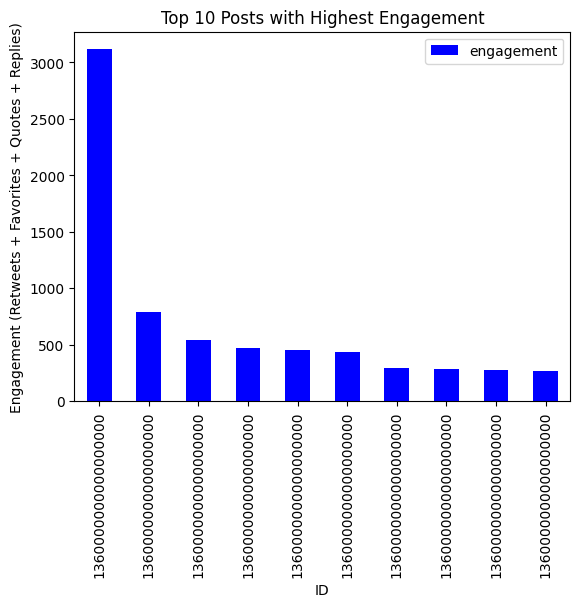

In [ ]:
#chart 1
# Calculate the total engagement for each tweet
df_filtered['engagement'] = df_filtered['retweet_count'] + df_filtered['favorite_count'] + df_filtered['reply_count'] + df_filtered['quote_count']

# Select the top 10 posts with the highest engagement
top_engagement_posts = df_filtered.sort_values(by='engagement', ascending=False).head(10)

# Plotting the top 10 posts with the highest engagement
plt.figure(figsize=(12, 6))
top_engagement_posts.plot(kind='bar', x='id', y='engagement', color='blue')
plt.title('Top 10 Posts with Highest Engagement')
plt.xlabel('ID')
plt.ylabel('Engagement (Retweets + Favorites + Quotes + Replies)')
plt.show()

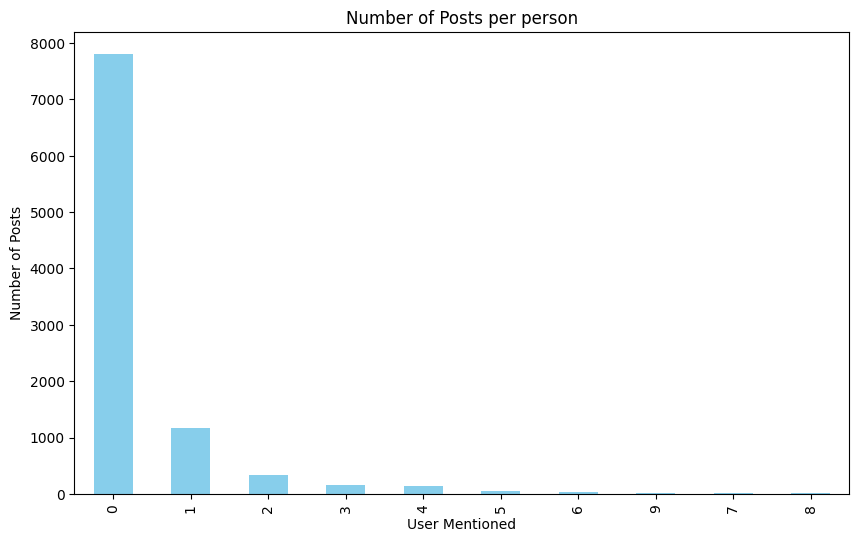

In [ ]:
#chart 2
source_counts = df_filtered['user_mentioned'].value_counts().head(10)

plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Posts per person')
plt.xlabel('User Mentioned')
plt.ylabel('Number of Posts')
plt.show()